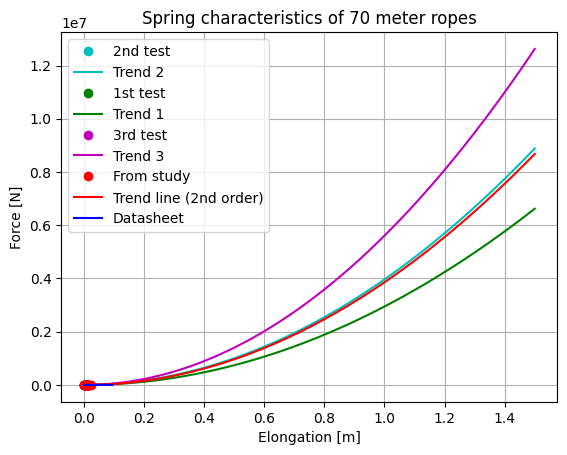

In [7]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 12 10:08:11 2022

@author: Skovby
"""

import matplotlib.pyplot as plt
import numpy as np

# Rigging:              https://roperobotics-my.sharepoint.com/:x:/p/thomas/ET8gwpjR7rdGmIPspEyNIG8BftfYGW7O1NyJPwLdd25gow?CID=F908E636-CDCF-49BB-8DDC-795DE4E7C290&wdLOR=c1FA0CE68-37B8-4B53-A342-22A4A4D86F75
# Study:                http://ras.papercept.net/images/temp/IROS/files/1971.pdf
# Liros broshure:       https://www.liros.com/userdata/files/LIROS_dinghy_brochure_2019_DINa5_hoch_12s_low_res.pdf
# D-Pro-XTR Pro:        https://www.deckhardware.com.au/liros-d-pro-xtr-sk99-4mm
# LIROS HERKULES 12MM:  https://aarhusseashop.dk/liros-herkules-12mm-hvid-sort-fald-skode-afmalt-laengde



#%% Dynema streach based on study
L_rope = 70; # Meters (Compared to field tests: 80 meter nacelle height and 
# 20 meter top ropes, with part of it horizontal)


# Data from figure 5 "Bedding-in test"
F_study = [0, 70, 270, 740, 1420, 2000];
l_study = np.multiply(np.divide([0, 0.5, 1, 1.5, 2, 2.4],100),L_rope)/70;

p_study = np.poly1d(np.polyfit(l_study, F_study, 2))

#%% Dynema streach based on datasheet

D_Pro_XTR     = [14700, 0.01]
k_D_Pro_XTR   = D_Pro_XTR[1] / D_Pro_XTR[0]

F_data = np.linspace(0, 2000, 100);
d_data = np.multiply(np.multiply(F_data,k_D_Pro_XTR),L_rope);


#%% From Field test

F1 = np.multiply([3, 11, 20, 28, 39, 48],9.82);
l1 = np.divide([113.5, 103, 92.3, 84.5, 76.3, 68.5],100)/70;
d1 = np.subtract(l1,l1[0])

F2 = np.multiply([0, 2, 8, 11, 19, 23, 30, 36],9.82);
l2 = np.divide([85, 76.2, 59, 50.5, 40.5, 32.5, 24, 18.7],100)/70;
d2 = np.subtract(l2,l2[0])

F3 = np.multiply([0,11,22,26, 34, 38, 56, 63, 72, 79, 89, 91],9.82);
l3 = np.divide([117,83, 65, 62, 57.5, 46, 39.5, 36.5, 31.5, 27.5, 22.5, 20],100)/70;
d3 = np.subtract(l3,l3[0])

p1 = np.poly1d(np.polyfit(-d1, F1, 2))
p2 = np.poly1d(np.polyfit(-d2, F2, 2))
p3 = np.poly1d(np.polyfit(-d3, F3, 2))
t = np.linspace(0, 1.5, 100)




plt.figure()
plt.plot(-d1,F1, 'oc' , label='2nd test')
plt.plot(t, p1(t), '-c', label='Trend 2')
plt.plot(-d2,F2,'og', label='1st test')
plt.plot(t, p2(t), '-g', label='Trend 1')
plt.plot(-d3,F3,'om', label='3rd test')
plt.plot(t, p3(t), '-m', label='Trend 3')
plt.plot(l_study,F_study, 'or' , label='From study')
plt.plot(t, p_study(t), '-r', label='Trend line (2nd order)')
plt.plot(d_data,F_data,'-b', label='Datasheet')
plt.xlabel('Elongation [m]')
plt.ylabel('Force [N]')
plt.title("Spring characteristics of %i meter ropes" %L_rope)
plt.grid(True)
plt.legend()

In [8]:
p1

poly1d([3.91940295e+06, 4.39673116e+04, 3.01524903e+01])

In [9]:
p2

poly1d([2.93651703e+06, 8.68316593e+03, 1.97777350e+00])

In [10]:
p4 = (p1+p2+p3)/3

In [19]:
p4

poly1d([4.15837635e+06, 1.32240246e+04, 1.39230850e+01])

In [22]:
1.39230850e+01

13.923085

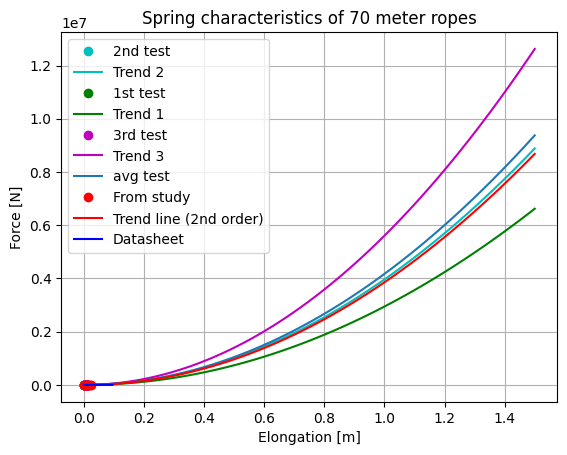

In [12]:
plt.figure()
plt.plot(-d1,F1, 'oc' , label='2nd test')
plt.plot(t, p1(t), '-c', label='Trend 2')
plt.plot(-d2,F2,'og', label='1st test')
plt.plot(t, p2(t), '-g', label='Trend 1')
plt.plot(-d3,F3,'om', label='3rd test')
plt.plot(t, p3(t), '-m', label='Trend 3')
plt.plot(t, p4(t), label="avg test")
plt.plot(l_study,F_study, 'or' , label='From study')
plt.plot(t, p_study(t), '-r', label='Trend line (2nd order)')
plt.plot(d_data,F_data,"b", label='Datasheet')
plt.xlabel('Elongation [m]')
plt.ylabel('Force [N]')
plt.title("Spring characteristics of %i meter ropes" %L_rope)
plt.grid(True)
plt.legend()